# Milestone 3: EDA

David Bombara, Nathan Dennis, and Aditya Saxena

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
import sqlite3
import csv
import warnings
warnings.filterwarnings("ignore",category=RuntimeWarning)

In [2]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']

# Increase the default font size
plt.rcParams['font.size'] = 22

## Table of Contents
- [**Loading the Data**](#intro)

- [**Infotable EDA**](#infotable)

- [**Coverpage EDA**](#coverpage)

- [**Summarypage EDA**](#summarypage)

- [**Data Cleaning**](#data-cleaning)

- [**Data Visualization**](#data-visualization)

<a id="intro"></a>

## Loading the Data

[Return to contents](#contents)

In [3]:
df_info = pd.read_csv("infotable_dataset.csv")
df_cover = pd.read_csv("coverpage_dataset.csv")
df_summary = pd.read_csv("summarypage_dataset.csv")

/var/folders/v2/5xt7prm10w1bkb7j4lrt_42m0000gn/T/ipykernel_15167/1029072304.py:1: DtypeWarning: Columns (5,9,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df_info = pd.read_csv("infotable_dataset.csv")


In [ ]:
conn = sqlite3.connect('../milestone2/FORM13F.db')
cursor = conn.cursor()
df_info = pd.read_sql(f"SELECT * FROM INFOTABLE_2024_Q3;", conn)
df_summary = pd.read_sql(f"SELECT * FROM SUMMARYPAGE_2024_Q3;", conn)
df_cover = pd.read_sql(f"SELECT * FROM COVERPAGE_2024_Q3;", conn)
conn.close()

In [6]:
print(f"Infotable has {len(df_info)} rows.")

Infotable has 3278515 rows.


In [7]:
print(f"Coverpage has {len(df_cover)} rows.")

Coverpage has 10117 rows.


In [8]:
print(f"Summarypage has {len(df_summary)} rows.")


Summarypage has 8244 rows.


<a id="summaryinfo"></a>

### Summary

In this summary section we look at basic information about the INFOTABLE dataset including its shape, data types, and descriptive statistics.

In [9]:
df_info.shape

(3278515, 16)

We see that the shape of the dataset for INFOTABLE contains 3278515 rows and 16 columns. We can further observe the data types for INFOTABLE:

In [10]:
print(df_info.dtypes)

ACCESSION_NUMBER        object
INFOTABLE_SK             int64
NAMEOFISSUER            object
TITLEOFCLASS            object
CUSIP                   object
FIGI                    object
VALUE                    int64
SSHPRNAMT                int64
SSHPRNAMTTYPE           object
PUTCALL                 object
INVESTMENTDISCRETION    object
OTHERMANAGER            object
VOTING_AUTH_SOLE         int64
VOTING_AUTH_SHARED       int64
VOTING_AUTH_NONE         int64
timestamp               object
dtype: object


Next, we look at the descriptive statistics for the numerical columns.

In [11]:
print(df_info.describe())

       INFOTABLE_SK         VALUE     SSHPRNAMT  VOTING_AUTH_SOLE  \
count  3.278515e+06  3.278515e+06  3.278515e+06      3.278515e+06   
mean   1.035340e+08  1.789295e+07  2.946283e+05      2.208318e+05   
std    9.464430e+05  6.866326e+08  2.682088e+07      2.671712e+07   
min    1.018926e+08  0.000000e+00  0.000000e+00      0.000000e+00   
25%    1.027144e+08  1.383600e+04  6.310000e+02      0.000000e+00   
50%    1.035340e+08  3.068430e+05  7.208000e+03      3.040000e+02   
75%    1.043537e+08  2.107060e+06  4.652700e+04      1.750000e+04   
max    1.051733e+08  5.453552e+11  4.197289e+10      4.197289e+10   

       VOTING_AUTH_SHARED  VOTING_AUTH_NONE  
count        3.278515e+06      3.278515e+06  
mean         2.144117e+04      6.022588e+04  
std          7.194901e+05      2.094831e+06  
min          0.000000e+00      0.000000e+00  
25%          0.000000e+00      0.000000e+00  
50%          0.000000e+00      0.000000e+00  
75%          0.000000e+00      1.558000e+03  
max       

We see that for the columns `VOTING_AUTH_SOLE`, `VOTING_AUTH_SHARED`, and `VOTING_AUTH_NONE` have many 0 values. These columns represent voting authority, which means that many entities do not hold

Next, we look at the descriptive statistics for the categorical columns.

In [12]:
print(df_info.describe(include=['object']))


            ACCESSION_NUMBER NAMEOFISSUER TITLEOFCLASS      CUSIP  \
count                3278515      3277716      3277505    3278515   
unique                  8125       137383        17383      38668   
top     0001086364-24-008417   ISHARES TR          COM  037833100   
freq                   48161       115603      1580355       9531   

                FIGI SSHPRNAMTTYPE PUTCALL INVESTMENTDISCRETION OTHERMANAGER  \
count         260310       3278515  115797              3278515      1519535   
unique         16021             2       2                    3         3262   
top     BBG019PD35Z0            SH    Call                 SOLE            1   
freq            2288       3247099   59458              2003219       266785   

         timestamp  
count      3278515  
unique           1  
top     2023-10-01  
freq       3278515  


<a id="missingvalues"></a>

### Missing Values

In this section we look at the missing values in each column of INFOTABLE.

In [13]:
print(df_info.isna().sum())

ACCESSION_NUMBER              0
INFOTABLE_SK                  0
NAMEOFISSUER                799
TITLEOFCLASS               1010
CUSIP                         0
FIGI                    3018205
VALUE                         0
SSHPRNAMT                     0
SSHPRNAMTTYPE                 0
PUTCALL                 3162718
INVESTMENTDISCRETION          0
OTHERMANAGER            1758980
VOTING_AUTH_SOLE              0
VOTING_AUTH_SHARED            0
VOTING_AUTH_NONE              0
timestamp                     0
dtype: int64


The columns `NAMEOFISSUER`, `TITLEOFCLASS`, `FIGI`, `PUTCALL`, and `OTHERMANAGER` have missing values. However, this will not be an issue. Note that `NAMEOFISSUER`, `TITLEOFCLASS`, and `FIGI` can be used to identifier the specific security, but this is unnecessary because the securities can be uniquely identified using the `CUSIP`. 

The `PUTCALL` column has many missing values, but these are easily filled in. If the value is missing, we can assume that the security is neither a put nor a call, but instead owned outright.

`OTHERMANAGER` has missing values, but this is not an issue. This column is only used when the investment discretion is shared with another manager. If the value is missing, then the investment discretion is not shared. 

In [14]:
df_info['PUTCALL'] = df_info['PUTCALL'].fillna('N/A')
df_info['OTHERMANAGER'] = df_info['OTHERMANAGER'].fillna('N/A')

<a id="coverpage"></a>

## Coverpage EDA

[Return to contents](#contents)

- [**Summary**](#summarycover)

- [**Missing Values**](#missingvaluescover)

- [**Data Imbalance**](#imbalancecover)

<a id="summarycover"></a>

### Summary

This section presents the basic summary of the COVERPAGE dataset, such as the data types, shape, and descriptive statistics of the columns.

In [15]:
print("Shape for Coverpage dataframe:")
print(df_cover.shape)

Shape for Coverpage dataframe:
(10117, 22)


We see that the COVERPAGE dataframe has 22 columns and 10117 rows. We observe the exact types and names of each column:

In [16]:
print("Data types of the columns for Coverpage:")
print(df_cover.dtypes)

Data types of the columns for Coverpage:
ACCESSION_NUMBER                 object
REPORTCALENDARORQUARTER          object
ISAMENDMENT                      object
AMENDMENTNO                     float64
AMENDMENTTYPE                    object
CONFDENIEDEXPIRED                object
DATEDENIEDEXPIRED                object
DATEREPORTED                     object
REASONFORNONCONFIDENTIALITY      object
FILINGMANAGER_NAME               object
FILINGMANAGER_STREET1            object
FILINGMANAGER_STREET2            object
FILINGMANAGER_CITY               object
FILINGMANAGER_STATEORCOUNTRY     object
FILINGMANAGER_ZIPCODE            object
REPORTTYPE                       object
FORM13FFILENUMBER                object
CRDNUMBER                       float64
SECFILENUMBER                    object
PROVIDEINFOFORINSTRUCTION5       object
ADDITIONALINFORMATION            object
timestamp                        object
dtype: object


Next, the descriptive statistics of the numeric columns:

In [17]:
print("Descriptive statistics for numerical columns:")
print(df_cover.describe())

Descriptive statistics for numerical columns:
       AMENDMENTNO     CRDNUMBER
count   406.000000  4.408000e+03
mean      1.238916  4.272362e+05
std       1.665796  1.393088e+07
min       1.000000  0.000000e+00
25%       1.000000  1.193845e+05
50%       1.000000  1.574280e+05
75%       1.000000  2.878568e+05
max      27.000000  9.215079e+08


We see there are only 2 numeric features in this dataset. However, AMENTMENTNO is simply just the amendment number, so it is essentially a categorical variable. Also, CRDNUMBER could also be interpreted as a categorical variable, so all the variables are categorical.

Next, the categorical columns:

In [18]:
print("Descriptive statistics for categorical columns:")
print(df_cover.describe(include=['object']))

Descriptive statistics for categorical columns:
            ACCESSION_NUMBER REPORTCALENDARORQUARTER ISAMENDMENT  \
count                  10117                   10117        5415   
unique                 10117                      42           2   
top     0002035951-24-000001             30-JUN-2024           N   
freq                       1                    9100        5009   

       AMENDMENTTYPE CONFDENIEDEXPIRED DATEDENIEDEXPIRED DATEREPORTED  \
count            406               116                16           16   
unique             2                 2                 6            9   
top      RESTATEMENT                 N       14-AUG-2024  15-MAY-2024   
freq             233               100                 8            5   

           REASONFORNONCONFIDENTIALITY        FILINGMANAGER_NAME  \
count                               16                     10117   
unique                               1                      9018   
top     Confidential Treatment Expired  G

<a id="missingvaluescover"></a>


### Missing values

In [19]:
df_cover['REPORTTYPE'].unique()

array(['13F HOLDINGS REPORT', '13F NOTICE', '13F COMBINATION REPORT'],
      dtype=object)

In [20]:
print("Number of missing values in each column of the infotable:")
print(df_cover.isna().sum())

Number of missing values in each column of the infotable:
ACCESSION_NUMBER                    0
REPORTCALENDARORQUARTER             0
ISAMENDMENT                      4702
AMENDMENTNO                      9711
AMENDMENTTYPE                    9711
CONFDENIEDEXPIRED               10001
DATEDENIEDEXPIRED               10101
DATEREPORTED                    10101
REASONFORNONCONFIDENTIALITY     10101
FILINGMANAGER_NAME                  0
FILINGMANAGER_STREET1               3
FILINGMANAGER_STREET2            4471
FILINGMANAGER_CITY                 11
FILINGMANAGER_STATEORCOUNTRY        3
FILINGMANAGER_ZIPCODE              21
REPORTTYPE                          0
FORM13FFILENUMBER                   0
CRDNUMBER                        5709
SECFILENUMBER                    5959
PROVIDEINFOFORINSTRUCTION5          0
ADDITIONALINFORMATION            9704
timestamp                           0
dtype: int64


Clearly, a large number of columns in the `COVERPAGE` table have missing values. This is not surprising, as not all columns are required to be filled out by the filer. For example, the `AMENDMENTNO` column is only filled out if the `ISAMENDMENT` column is checked. In our data analysis, the only columns that we may use are `ACCESSION_NUMBER`, `REPORTCALENDARORQUARTER`, and `ISAMENDMENT`. Therefore, we can replace missing values in `ISAMENDMENT` with `N` and missing values in `AMENDMENTNO` with `0`.

In [21]:
df_cover['AMENDMENTNO'] = df_cover['AMENDMENTNO'].fillna(0)
df_cover['AMENDMENTTYPE'] = df_cover['AMENDMENTTYPE'].fillna('NEW HOLDINGS')

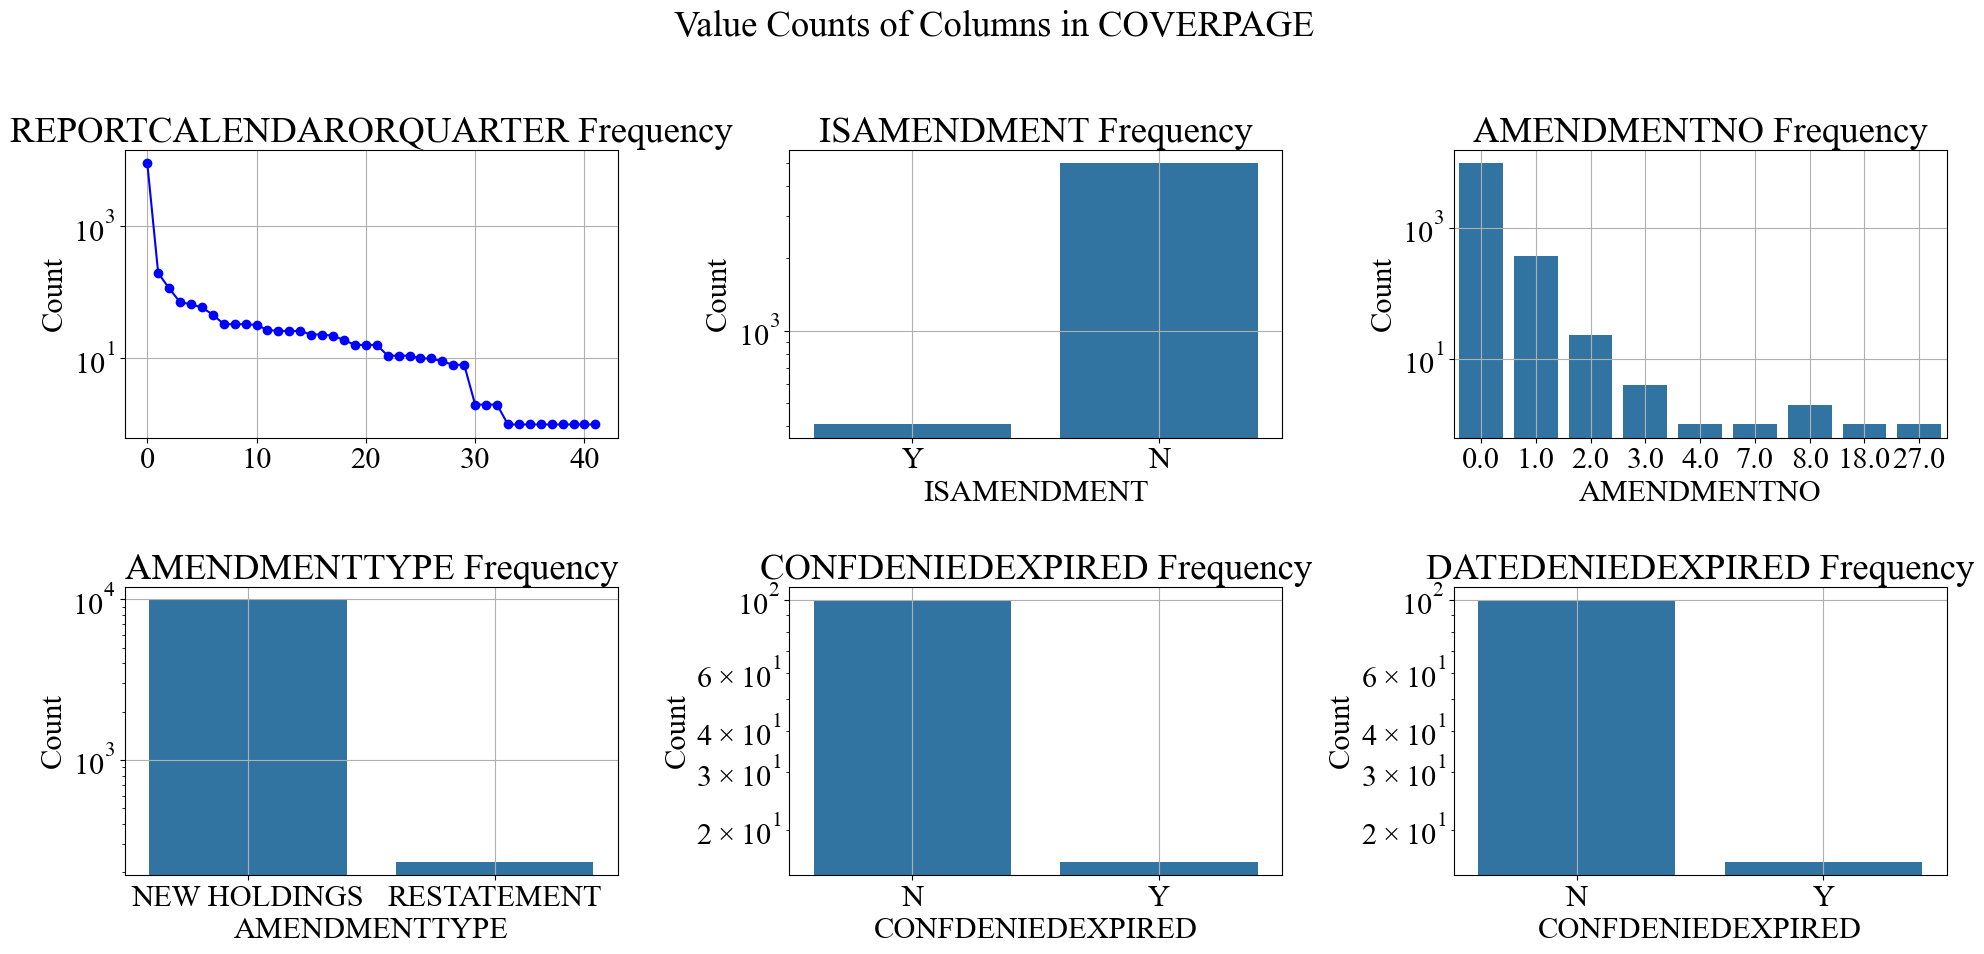

In [22]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(20, 10))

ax[0,0].plot(df_cover['REPORTCALENDARORQUARTER'].value_counts().values, 
             color='blue', linestyle='-', marker='o')
ax[0,0].set_yscale('log')
ax[0,0].set_title("REPORTCALENDARORQUARTER Frequency")
ax[0,0].set_ylabel("Count")
ax[0,0].grid(True)

sns.countplot(data=df_cover, x='ISAMENDMENT', ax=ax[0,1])
ax[0,1].set_yscale('log')
ax[0,1].set_title("ISAMENDMENT Frequency")
ax[0,1].set_ylabel("Count")
ax[0,1].grid(True)

sns.countplot(data=df_cover, x='AMENDMENTNO', ax=ax[0,2])
ax[0,2].set_yscale('log')
ax[0,2].set_title("AMENDMENTNO Frequency")
ax[0,2].grid(True)
ax[0,2].set_ylabel("Count")

sns.countplot(data=df_cover, x='AMENDMENTTYPE', ax=ax[1,0])
ax[1,0].set_yscale('log')
ax[1,0].set_title("AMENDMENTTYPE Frequency")
ax[1,0].set_ylabel("Count")
ax[1,0].grid(True)

sns.countplot(data=df_cover, x='CONFDENIEDEXPIRED', ax=ax[1,1])
ax[1,1].set_yscale('log')
ax[1,1].set_title("CONFDENIEDEXPIRED Frequency")
ax[1,1].set_ylabel("Count")
ax[1,1].grid(True)

sns.countplot(data=df_cover, x='CONFDENIEDEXPIRED', ax=ax[1,2])
ax[1,2].set_yscale('log')
ax[1,2].set_title("DATEDENIEDEXPIRED Frequency")
ax[1,2].set_ylabel("Count")
ax[1,2].grid(True)

plt.suptitle("Value Counts of Columns in COVERPAGE")
plt.tight_layout(pad=1.5)
plt.show()

<a id="summarypage"></a>

## Summarypage EDA

[Return to contents]( #contents)

- [**Summary**](#summarysummary)

- [**Missing Values**](#missingvaluessummary)

- [**Data Imbalance**](#imbalancesummary)

<a id="summarysummary"></a>

### Summary

In [23]:
print("Shape for Summarypage dataframe:")
print(df_summary.shape)

Shape for Summarypage dataframe:
(8244, 6)


In [24]:
print("Data types of the columns for Summarypage:")
print(df_summary.dtypes)

Data types of the columns for Summarypage:
ACCESSION_NUMBER              object
OTHERINCLUDEDMANAGERSCOUNT     int64
TABLEENTRYTOTAL                int64
TABLEVALUETOTAL                int64
ISCONFIDENTIALOMITTED         object
timestamp                     object
dtype: object


In [25]:
print("Descriptive statistics for numerical columns:")
print(df_summary.describe())

Descriptive statistics for numerical columns:
       OTHERINCLUDEDMANAGERSCOUNT  TABLEENTRYTOTAL  TABLEVALUETOTAL
count                 8244.000000      8244.000000     8.244000e+03
mean                     0.426371       792.687773     7.108208e+09
std                      2.111025     16643.253831     9.897344e+10
min                      0.000000         0.000000     0.000000e+00
25%                      0.000000        33.000000     1.368915e+08
50%                      0.000000        94.000000     3.001886e+08
75%                      0.000000       230.250000     9.427800e+08
max                     69.000000    992103.000000     5.205558e+12


In [26]:
print("Descriptive statistics for categorical columns:")
print(df_summary.describe(include=['object']))

Descriptive statistics for categorical columns:
            ACCESSION_NUMBER ISCONFIDENTIALOMITTED   timestamp
count                   8244                  5501        8244
unique                  8244                     2           1
top     0002035951-24-000001                     N  2023-10-01
freq                       1                  5387        8244


In [27]:
print("Number of missing values in each column of the summary page:")
print(df_summary.isna().sum())

Number of missing values in each column of the summary page:
ACCESSION_NUMBER                 0
OTHERINCLUDEDMANAGERSCOUNT       0
TABLEENTRYTOTAL                  0
TABLEVALUETOTAL                  0
ISCONFIDENTIALOMITTED         2743
timestamp                        0
dtype: int64


The only column with missing values is `ISCONFIDENTIALOMITTED`. This column is a boolean column that indicates whether the data is confidential. If the value is missing, we can assume that the data is not confidential.

In [28]:
df_summary['ISCONFIDENTIALOMITTED'] = df_summary['ISCONFIDENTIALOMITTED'].fillna('N/A')

## Data Cleaning and Augmentation<a id="data-cleaning"></a>
[Return to contents](#contents)

#### Remove rows from `db_info` that report "principal amount"

To keep analysis consistent, we are only looking at rows that report the number of shares.

In [29]:
df_info = df_info[df_info['SSHPRNAMTTYPE'] == 'SH']

#### Merge `df_summary` with `df_cover`

In [30]:
df_investor = df_cover.merge(df_summary, how='inner', on='ACCESSION_NUMBER')

#### Drop two rows whose values appear to be incorrect

For these rows, the number of shares (`SSHPRNAMT`) appears to be reported as an unreasonably high number whereas the `VALUE` appears to be unreasonably row. We will drop these rows. Two rows are negligible in the context of the entire dataset.

In [31]:
df_info = df_info[df_info['ACCESSION_NUMBER'] != '0001104659-24-089646']
df_info = df_info[df_info['ACCESSION_NUMBER'] != '0000894189-24-004736']

#### Ensure datatypes are correct

In [32]:
df_info['SSHPRNAMT'] = df_info['SSHPRNAMT'].astype(float)

#### Compute summary statistics for each institution (`ACCESSION_NUMBER`) in `df_info`.

In [33]:
s = df_info.groupby(by="ACCESSION_NUMBER")['VALUE'].mean()
s = s.rename("MEAN VALUE")
df_stats = s.to_frame()

In [34]:
df_stats['MIN VALUE'] = df_info.groupby(by='ACCESSION_NUMBER')['VALUE'].min()
df_stats['MAX VALUE'] = df_info.groupby(by='ACCESSION_NUMBER')['VALUE'].max()
df_stats['STD VALUE'] = df_info.groupby(by='ACCESSION_NUMBER')['VALUE'].std()
df_stats['25% VALUE'] = df_info.groupby(by='ACCESSION_NUMBER')['VALUE'].quantile(q = 0.25)
df_stats['50% VALUE'] = df_info.groupby(by='ACCESSION_NUMBER')['VALUE'].median()
df_stats['75% VALUE'] = df_info.groupby(by='ACCESSION_NUMBER')['VALUE'].quantile(q = 0.75)
df_stats['10% VALUE'] = df_info.groupby(by='ACCESSION_NUMBER')['VALUE'].quantile(q = 0.10)
df_stats['90% VALUE'] = df_info.groupby(by='ACCESSION_NUMBER')['VALUE'].quantile(q = 0.90)
df_stats['99% VALUE'] = df_info.groupby(by='ACCESSION_NUMBER')['VALUE'].quantile(q = 0.99)
df_stats['01% VALUE'] = df_info.groupby(by='ACCESSION_NUMBER')['VALUE'].quantile(q = 0.01)

In [35]:
df_stats['MEAN SHAMT'] = df_info.groupby(by='ACCESSION_NUMBER')['SSHPRNAMT'].mean()
df_stats['MIN SHAMT'] = df_info.groupby(by='ACCESSION_NUMBER')['SSHPRNAMT'].min()
df_stats['MAX SHAMT'] = df_info.groupby(by='ACCESSION_NUMBER')['SSHPRNAMT'].max()
df_stats['STD SHAMT'] = df_info.groupby(by='ACCESSION_NUMBER')['SSHPRNAMT'].std()
df_stats['25% SHAMT'] = df_info.groupby(by='ACCESSION_NUMBER')['SSHPRNAMT'].quantile(q = 0.25)
df_stats['50% SHAMT'] = df_info.groupby(by='ACCESSION_NUMBER')['SSHPRNAMT'].median()
df_stats['75% SHAMT'] = df_info.groupby(by='ACCESSION_NUMBER')['SSHPRNAMT'].quantile(q = 0.75)
df_stats['10% SHAMT'] = df_info.groupby(by='ACCESSION_NUMBER')['SSHPRNAMT'].quantile(q = 0.10)
df_stats['90% SHAMT'] = df_info.groupby(by='ACCESSION_NUMBER')['SSHPRNAMT'].quantile(q = 0.90)
df_stats['99% SHAMT'] = df_info.groupby(by='ACCESSION_NUMBER')['SSHPRNAMT'].quantile(q = 0.99)
df_stats['01% SHAMT'] = df_info.groupby(by='ACCESSION_NUMBER')['SSHPRNAMT'].quantile(q = 0.01)

In [36]:
df_stats = df_stats.reset_index()

#### Add feature for US vs. non-US institutions

In [37]:
state_df = pd.read_csv("state_list.csv")
state_set = set(list(state_df['Abbreviation']))
def UnitedStatesIndicator(x):
    # check if the location is in the US based on the state abbreviation
    return (x in state_set) 
df_investor['US_Indicator'] = df_investor['FILINGMANAGER_STATEORCOUNTRY'].apply(UnitedStatesIndicator)

#### Get full country/state name

In [38]:
# Initialize an empty dictionary
state_dict = {}
# Open the CSV file
with open('state_country_abbreviations.csv', mode='r') as file:
    reader = csv.reader(file,skipinitialspace = True)
    # Iterate through the rows in the file
    for row in reader:
        # Assign the first column as the key and the second column as the value
        state_dict[row[0]] = row[1]
        
def get_country_state(x):
    try: return state_dict[x]
    except KeyError: return np.nan
    
df_investor['State_Country_Full'] = df_investor['FILINGMANAGER_STATEORCOUNTRY'].apply(get_country_state)

#### Import US State GDP data

Additionally, we will add a column that indicates whther the institution is located in the United States.

In [39]:
df_state_gdp = pd.read_csv("state-gdp.csv")
df_state_gdp.columns.values

array(['State', 'Abbreviation', 'Region', '2022_MM', '2023_MM',
       '2023_Q4_Seasonally_Adjusted_MM', '2024_Q1_Seasonall_Adjusted_MM',
       '2024_Q2_Seasonall_Adjusted_MM',
       '2023_Percent_Change_From_Preceding_Period',
       '2024_Q1_Percent_Change_From_Preceding_Period',
       '2024_Q2_Percent_Change_From_Preceding_Period'], dtype=object)

In [40]:
df_ = df_investor['FILINGMANAGER_STATEORCOUNTRY'].value_counts().to_frame().reset_index()
df_

,FILINGMANAGER_STATEORCOUNTRY,count
0,NY,1048
1,CA,887
2,TX,457
3,MA,394
4,FL,364
...,...,...
100,J1,1
101,O1,1
102,O9,1
103,R5,1


In [41]:
df_state_gdp =df_state_gdp.merge(right=df_, how='inner',left_on = 'Abbreviation',right_on='FILINGMANAGER_STATEORCOUNTRY')

In [42]:
df_us = df_investor[df_investor['US_Indicator'] == True]

In [43]:
df_us2 = df_us.merge(
    right=df_state_gdp, 
    how='inner', 
    left_on = 'FILINGMANAGER_STATEORCOUNTRY', 
    right_on='Abbreviation')

#### Merge `df_stats` with `df_us2`

In [44]:
df_us2 = df_us2.merge(right=df_stats, how='inner',on='ACCESSION_NUMBER')

#### Get investor city

In [45]:
df_us2['FILINGMANAGER_CITY'] = df_us2['FILINGMANAGER_CITY'].str.lower()

In [46]:
df_us2['FILINGMANAGER_CITY'].value_counts()

FILINGMANAGER_CITY
new york              824
boston                192
chicago               179
san francisco         157
houston               109
                     ... 
sante fe                1
saint paul              1
indian rocks beach      1
kokomo                  1
kerrville               1
Name: count, Length: 1276, dtype: int64

#### Choose features

In [47]:
features = [
    'TABLEENTRYTOTAL',
    'TABLEVALUETOTAL',
    '2024_Q2_Seasonall_Adjusted_MM',
    '2024_Q2_Percent_Change_From_Preceding_Period',
    'MIN VALUE',
    'MAX VALUE',
    'MEAN VALUE',
    'STD VALUE',
    '25% VALUE',
    '50% VALUE',
    '75% VALUE',
    '01% VALUE',
    '99% VALUE',
    '10% VALUE',
    '90% VALUE',
    'MIN SHAMT',
    'MAX SHAMT',
    'MEAN SHAMT',
    'STD SHAMT',
    '25% SHAMT',
    '50% SHAMT',
    '75% SHAMT',
    '01% SHAMT',
    '99% SHAMT',
    '10% SHAMT',
    '90% SHAMT',
]

In [48]:
def get_log_feature(x):
    try: return np.log(x)
    except RuntimeWarning: return 0

In [49]:
log_features = [
    'LOG TABLEENTRYTOTAL',
    'LOG TABLEVALUETOTAL',
    'LOG 2024_Q2_Seasonall_Adjusted_MM',
    'LOG 2024_Q2_Percent_Change_From_Preceding_Period',
    'LOG MIN VALUE',
    'LOG MAX VALUE',
    'LOG MEAN VALUE',
    'LOG STD VALUE',
    'LOG 25% VALUE',
    'LOG 50% VALUE',
    'LOG 75% VALUE',
    'LOG 01% VALUE',
    'LOG 99% VALUE',
    'LOG 10% VALUE',
    'LOG 90% VALUE',
    'LOG MIN SHAMT',
    'LOG MAX SHAMT',
    'LOG MEAN SHAMT',
    'LOG STD SHAMT',
    'LOG 25% SHAMT',
    'LOG 50% SHAMT',
    'LOG 75% SHAMT',
    'LOG 01% SHAMT',
    'LOG 99% SHAMT',
    'LOG 10% SHAMT',
    'LOG 90% SHAMT',
]

In [50]:
for i, log_feature in enumerate(log_features):
    df_us2[log_feature] = df_us2[features[i]].apply(get_log_feature)
feature_list = log_features
feature_list.append('OTHERINCLUDEDMANAGERSCOUNT')
df_starlog = df_us2[log_features]
df_star = df_us2[features]
df_star.to_csv("df_star.csv")
# feature_list

In [120]:
df_us2

,ACCESSION_NUMBER,REPORTCALENDARORQUARTER,ISAMENDMENT,AMENDMENTNO,AMENDMENTTYPE,CONFDENIEDEXPIRED,DATEDENIEDEXPIRED,DATEREPORTED,REASONFORNONCONFIDENTIALITY,FILINGMANAGER_NAME,...,LOG MAX SHAMT,LOG MEAN SHAMT,LOG STD SHAMT,LOG 25% SHAMT,LOG 50% SHAMT,LOG 75% SHAMT,LOG 01% SHAMT,LOG 99% SHAMT,LOG 10% SHAMT,LOG 90% SHAMT
0,0002035951-24-000001,30-JUN-2024,NaN,0.0,NEW HOLDINGS,NaN,NaN,NaN,NaN,Creekside Partners,...,12.405280,9.804426,10.327945,8.020024,8.995723,9.920922,6.273198,11.801193,7.185160,10.514785
1,0002035548-24-000001,30-JUN-2024,NaN,0.0,NEW HOLDINGS,NaN,NaN,NaN,NaN,Brown Financial Advisors,...,12.628582,9.702978,10.479292,6.134482,8.209036,9.618901,2.217027,12.163329,3.577948,10.621791
2,0002023709-24-000003,31-MAR-2024,NaN,0.0,NEW HOLDINGS,NaN,NaN,NaN,NaN,NCP Inc.,...,11.633177,8.748064,9.694553,5.020586,6.396930,8.171953,1.740466,11.280599,3.713572,9.662116
3,0001420506-24-001962,30-JUN-2024,Y,1.0,NEW HOLDINGS,N,NaN,NaN,NaN,SW Investment Management LLC,...,15.319588,13.458836,13.943712,12.611538,12.729321,13.122363,10.183011,15.224178,12.095141,13.933294
4,0002023709-24-000002,30-JUN-2024,NaN,0.0,NEW HOLDINGS,NaN,NaN,NaN,NaN,NCP Inc.,...,12.100101,8.931397,10.058834,5.068904,6.332391,8.046309,1.747459,11.608890,3.843744,9.546055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7046,0001573767-24-000014,31-MAR-2024,Y,1.0,NEW HOLDINGS,NaN,NaN,NaN,NaN,HAMILTON LANE ADVISORS LLC,...,15.945032,13.746338,14.555338,10.149097,11.884758,13.123944,8.875360,15.841736,10.006910,14.636564
7047,0001573767-24-000013,31-DEC-2023,Y,1.0,NEW HOLDINGS,NaN,NaN,NaN,NaN,HAMILTON LANE ADVISORS LLC,...,15.945032,13.381527,14.360504,10.309985,11.663606,12.596436,8.802335,15.778571,9.237518,13.982339
7048,0001573767-24-000012,30-SEP-2023,Y,1.0,NEW HOLDINGS,NaN,NaN,NaN,NaN,HAMILTON LANE ADVISORS LLC,...,15.945032,13.297660,14.279301,10.414333,11.278418,12.583174,8.790847,15.741675,10.015476,13.880835
7049,0001683689-24-000002,31-MAR-2024,NaN,0.0,NEW HOLDINGS,NaN,NaN,NaN,NaN,Kopp LeRoy C,...,13.704030,12.144435,12.406478,7.047517,11.244091,12.377889,5.139322,13.640419,6.336826,13.033783


## Data Visualization and Insights <a name="data-visualization"></a>

#### Average value of securities held by institution

Each institutional investor holds a porfolio of securities that are reported on Form 13F. Each security is held in given quantity at a given value. We can compute the average value of securities held by each institution. Note that on Form 13F, the total value of the securities is reported, not the price of one share.

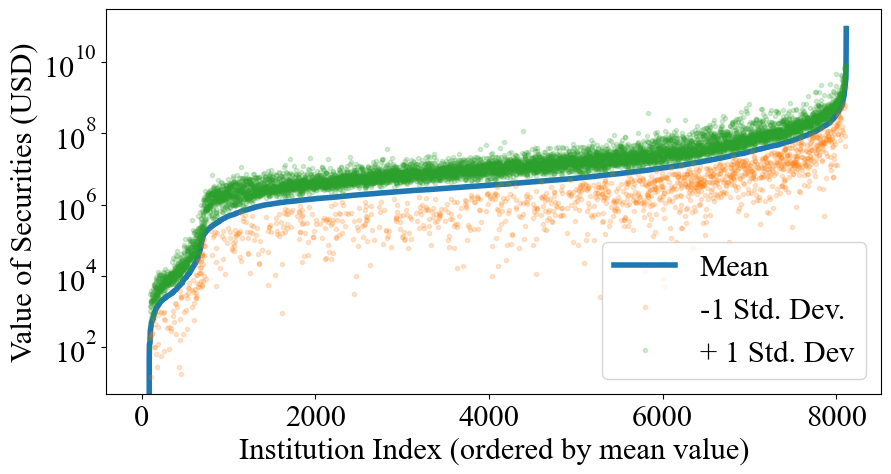

In [51]:
df_stats_sorted = df_stats.sort_values(by="MEAN VALUE")
x = np.arange(len(df_stats_sorted))
fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.plot(x, df_stats_sorted['MEAN VALUE'], label='Mean',linewidth=4)
ax.plot(x, df_stats_sorted['MEAN VALUE'] - df_stats_sorted['STD VALUE'],'.', alpha=0.2,label='-1 Std. Dev.')
ax.plot(x, df_stats_sorted['MEAN VALUE'] + df_stats_sorted['STD VALUE'],'.', alpha=0.2, label='+ 1 Std. Dev')
ax.set_ylabel("Value of Securities (USD)")
ax.legend()
ax.set_xlabel("Institution Index (ordered by mean value)")
ax.set_yscale("log")

#### State GDP vs. Number of Investors per State

Here, each data point represents an indvidual state. States with higher GDPs have more investors. This is not surprising as states with higher GDPs have more economic activity and thus more investors.

Text(0.5, 1.0, 'State GDP vs. Number of Investors From Each State')

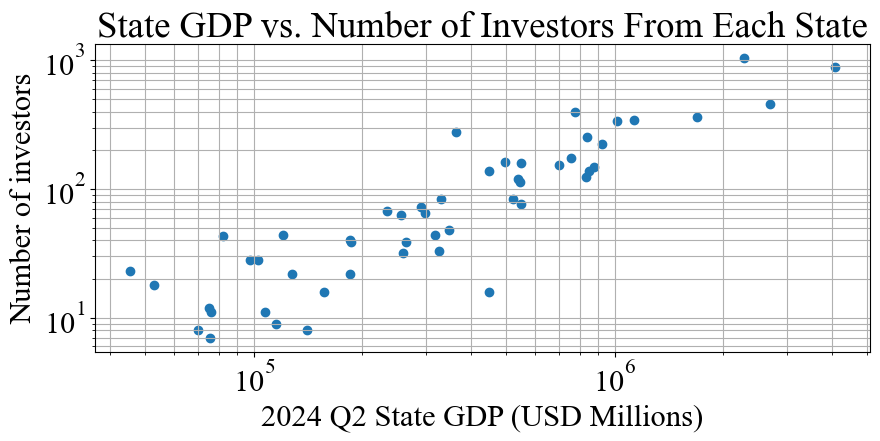

In [52]:
fig, ax = plt.subplots(1,1,figsize=(10,4))
ax.scatter(df_state_gdp['2024_Q2_Seasonall_Adjusted_MM'], df_state_gdp['count'])
ax.set_xscale('log')
ax.set_xlabel("2024 Q2 State GDP (USD Millions)")
ax.set_ylabel("Number of investors")
ax.grid(True,which='both')
ax.set_yscale('log')
ax.set_title("State GDP vs. Number of Investors From Each State")

### Numerical Correlations with `TOTAL_VALUE`

#### Correlating `TOTAL_VALUE` with the summary statistics of the `VALUE` column in `df_info`.

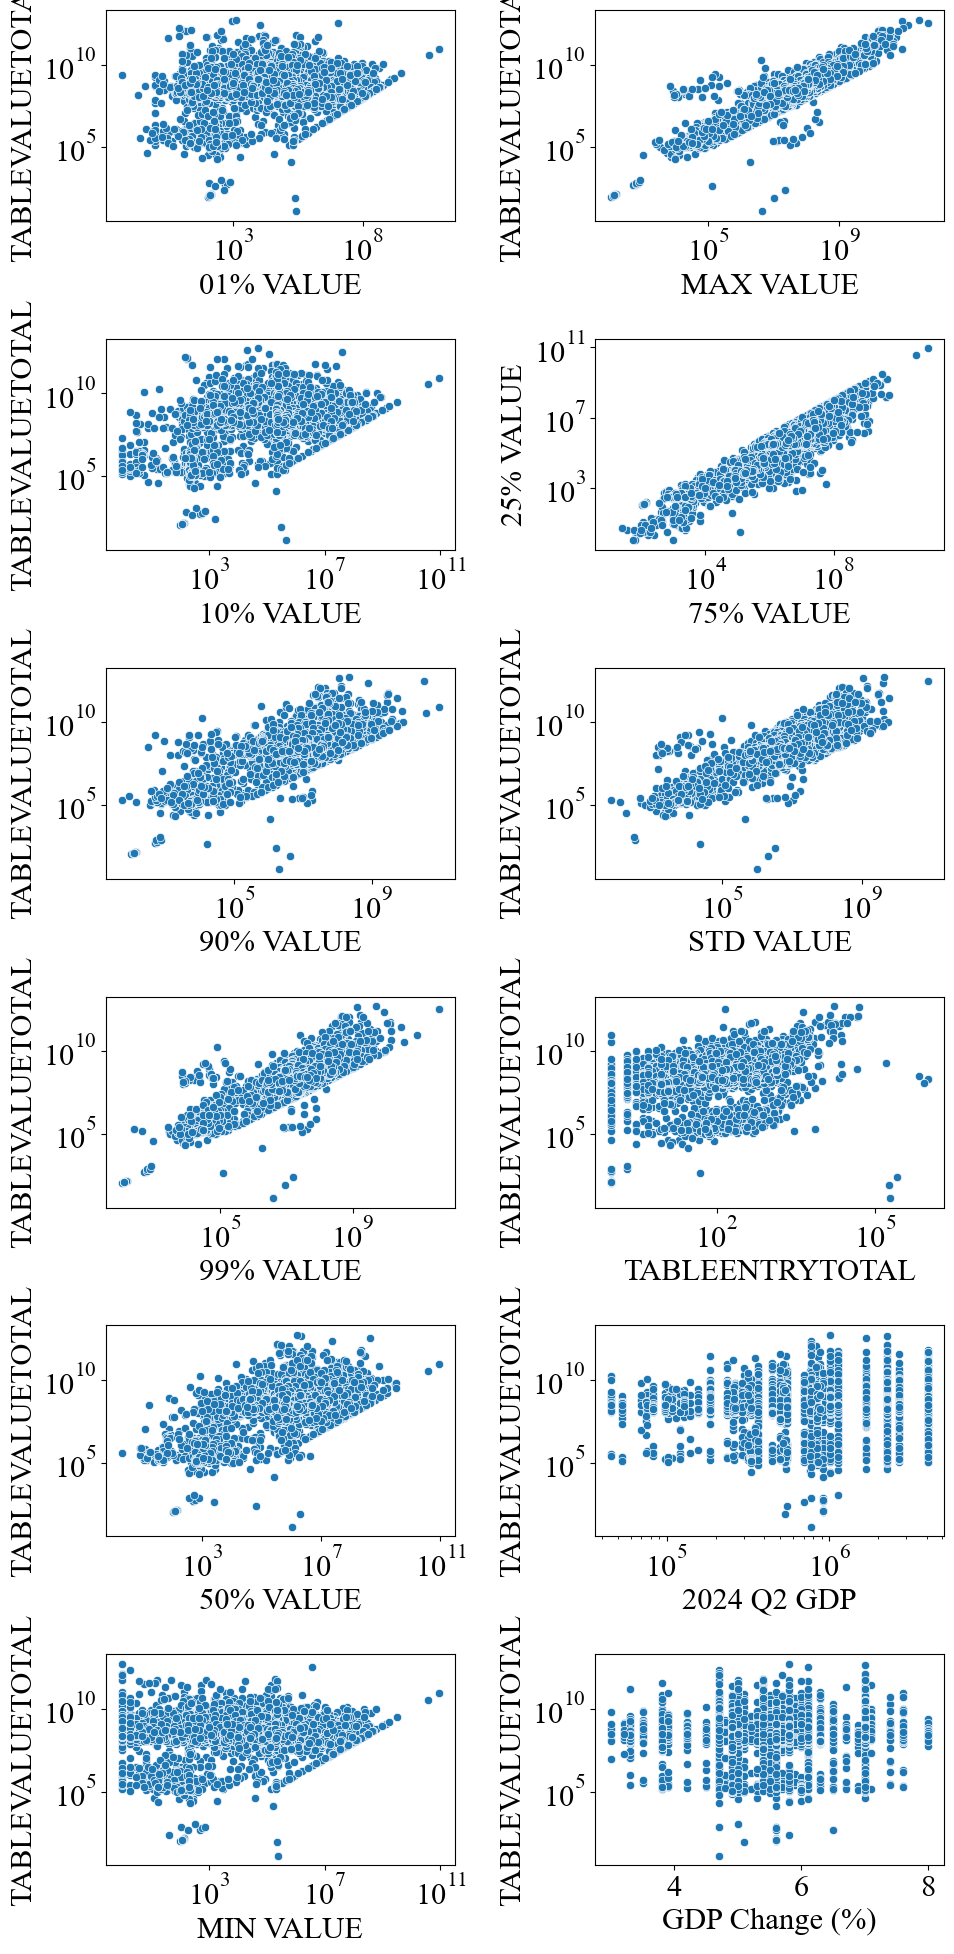

In [53]:
fig, ax = plt.subplots(6,2,figsize=(10,20))
a1 = ax[0,0]
a2 = ax[1,0]
a3 = ax[2,0]

a4 = ax[3,0]
a5 = ax[4,0]
a6 = ax[5,0]

a7 = ax[0,1]
a8 = ax[1,1]
a9 = ax[2,1]

a10 = ax[3,1]
a11 = ax[4,1]
a12 = ax[5,1]

# a1 = ax
sns.scatterplot(data = df_star, y = 'TABLEVALUETOTAL', x = '01% VALUE', ax = a1)
a1.set_xscale("log"), a1.set_yscale("log")

sns.scatterplot(data = df_star, y = 'TABLEVALUETOTAL', x = '10% VALUE', ax = a2)
a2.set_xscale("log"), a2.set_yscale("log")

sns.scatterplot(data = df_star, y = 'TABLEVALUETOTAL', x = '90% VALUE', ax = a3)
a3.set_xscale("log"), a3.set_yscale("log")

sns.scatterplot(data = df_star, y = 'TABLEVALUETOTAL', x = '99% VALUE', ax = a4)
a4.set_xscale("log"), a4.set_yscale("log")

sns.scatterplot(data = df_star, y = 'TABLEVALUETOTAL', x = '50% VALUE', ax = a5)
a5.set_xscale("log"), a5.set_yscale("log")

sns.scatterplot(data = df_star, y = 'TABLEVALUETOTAL', x = 'MIN VALUE', ax = a6)
a6.set_xscale("log"), a6.set_yscale("log")

sns.scatterplot(data = df_star, y = 'TABLEVALUETOTAL', x = 'MAX VALUE', ax = a7)
a7.set_xscale("log"), a7.set_yscale("log")

sns.scatterplot(data = df_star, y = '25% VALUE', x = '75% VALUE', ax = a8)
a8.set_xscale("log"), a8.set_yscale("log")

sns.scatterplot(data = df_star, y = 'TABLEVALUETOTAL', x = 'STD VALUE', ax = a9)
a9.set_xscale("log"), a9.set_yscale("log")

sns.scatterplot(data = df_star, x = 'TABLEENTRYTOTAL', y = 'TABLEVALUETOTAL', ax = a10)
a10.set_xscale("log"), a10.set_yscale("log")

sns.scatterplot(data = df_star, x = '2024_Q2_Seasonall_Adjusted_MM', y = 'TABLEVALUETOTAL', ax = a11)
a11.set_xscale("log"), a11.set_yscale("log")
a11.set_xlabel("2024 Q2 GDP")

sns.scatterplot(data = df_star, x = '2024_Q2_Percent_Change_From_Preceding_Period', y = 'TABLEVALUETOTAL', ax = a12)
a12.set_xlabel("GDP Change (%)")
# ax.set_xscale("log")
a12.set_yscale("log")
plt.tight_layout()
plt.show()

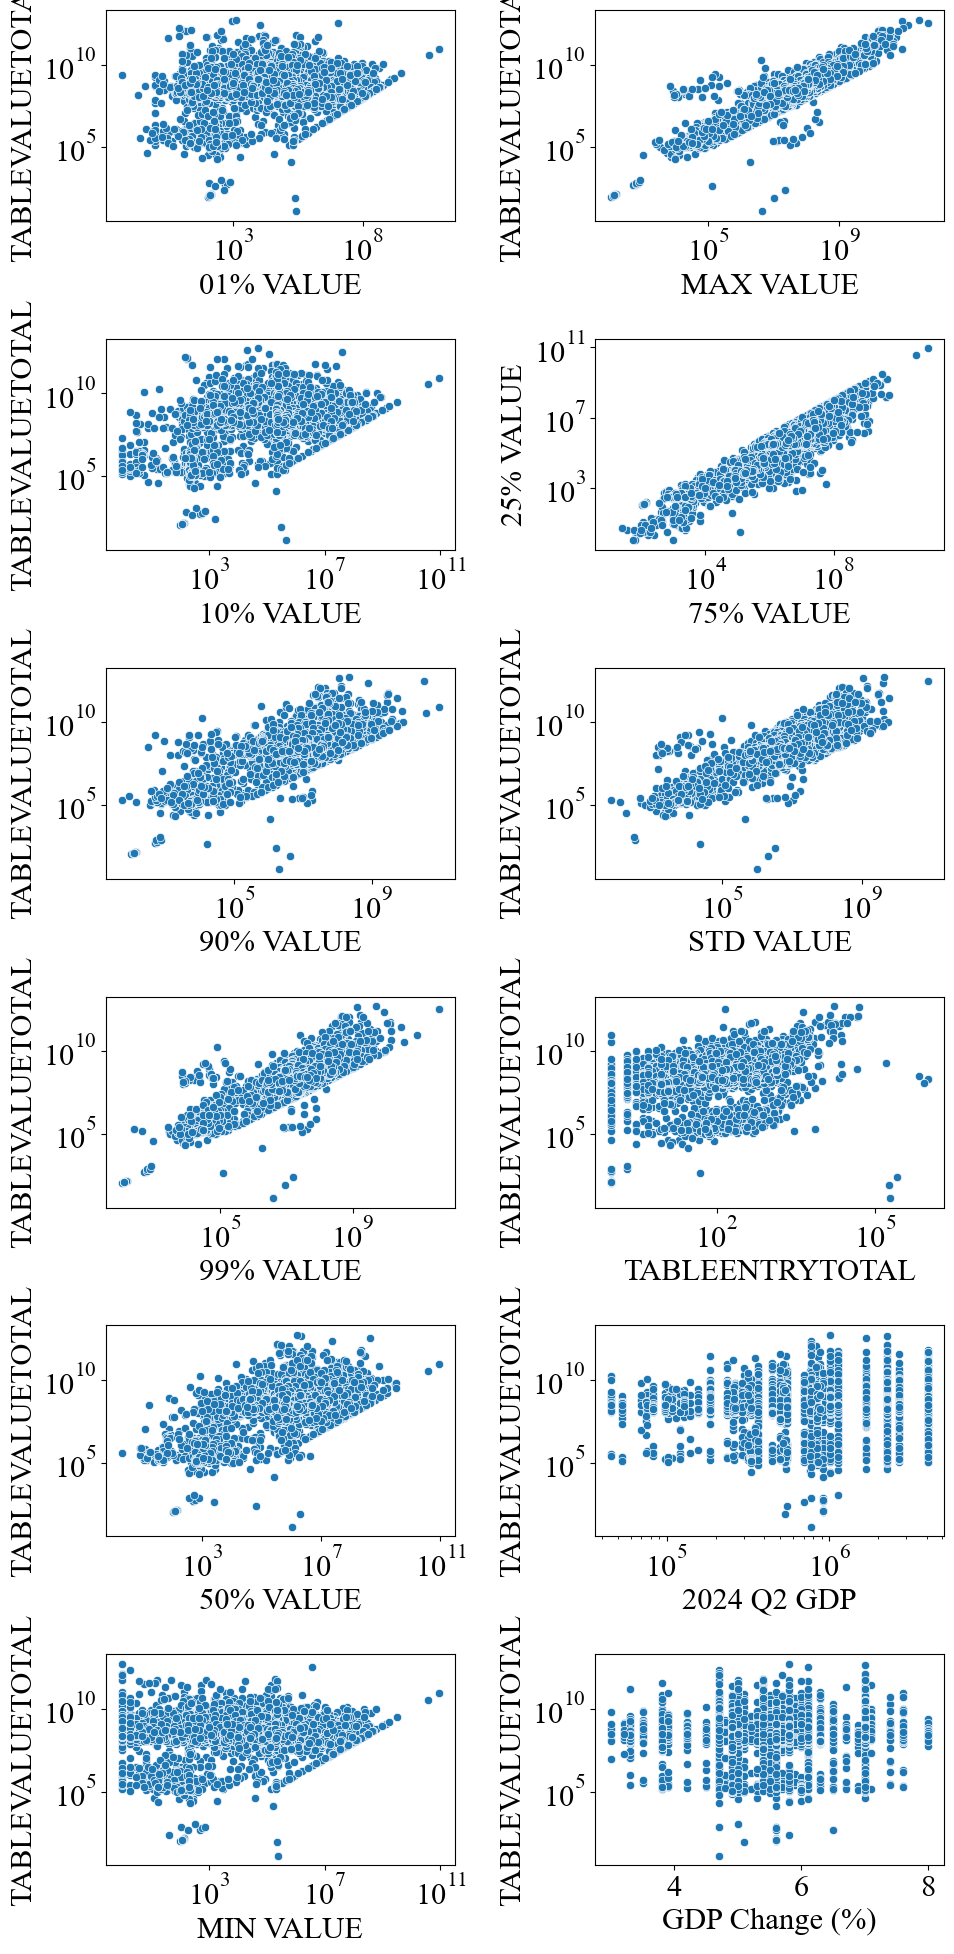

In [54]:
# fig, ax = plt.subplots(1,1,figsize=(6,3))
fig, ax = plt.subplots(6,2,figsize=(10,20))
a1 = ax[0,0]
a2 = ax[1,0]
a3 = ax[2,0]

a4 = ax[3,0]
a5 = ax[4,0]
a6 = ax[5,0]

a7 = ax[0,1]
a8 = ax[1,1]
a9 = ax[2,1]

a10 = ax[3,1]
a11 = ax[4,1]
a12 = ax[5,1]

# a1 = ax
sns.scatterplot(data = df_star, y = 'TABLEVALUETOTAL', x = '01% VALUE', ax = a1)
a1.set_xscale("log"), a1.set_yscale("log")

sns.scatterplot(data = df_star, y = 'TABLEVALUETOTAL', x = '10% VALUE', ax = a2)
a2.set_xscale("log"), a2.set_yscale("log")

sns.scatterplot(data = df_star, y = 'TABLEVALUETOTAL', x = '90% VALUE', ax = a3)
a3.set_xscale("log"), a3.set_yscale("log")

sns.scatterplot(data = df_star, y = 'TABLEVALUETOTAL', x = '99% VALUE', ax = a4)
a4.set_xscale("log"), a4.set_yscale("log")

sns.scatterplot(data = df_star, y = 'TABLEVALUETOTAL', x = '50% VALUE', ax = a5)
a5.set_xscale("log"), a5.set_yscale("log")

sns.scatterplot(data = df_star, y = 'TABLEVALUETOTAL', x = 'MIN VALUE', ax = a6)
a6.set_xscale("log"), a6.set_yscale("log")

sns.scatterplot(data = df_star, y = 'TABLEVALUETOTAL', x = 'MAX VALUE', ax = a7)
a7.set_xscale("log"), a7.set_yscale("log")

sns.scatterplot(data = df_star, y = '25% VALUE', x = '75% VALUE', ax = a8)
a8.set_xscale("log"), a8.set_yscale("log")

sns.scatterplot(data = df_star, y = 'TABLEVALUETOTAL', x = 'STD VALUE', ax = a9)
a9.set_xscale("log"), a9.set_yscale("log")

sns.scatterplot(data = df_star, x = 'TABLEENTRYTOTAL', y = 'TABLEVALUETOTAL', ax = a10)
a10.set_xscale("log"), a10.set_yscale("log")

sns.scatterplot(data = df_star, x = '2024_Q2_Seasonall_Adjusted_MM', y = 'TABLEVALUETOTAL', ax = a11)
a11.set_xscale("log"), a11.set_yscale("log")
a11.set_xlabel("2024 Q2 GDP")

sns.scatterplot(data = df_star, x = '2024_Q2_Percent_Change_From_Preceding_Period', y = 'TABLEVALUETOTAL', ax = a12)
a12.set_xlabel("GDP Change (%)")
# ax.set_xscale("log")
a12.set_yscale("log")
plt.tight_layout()
plt.show()


#### Correlating `TOTAL_VALUE` with the summary statistics of the `SSHPRNAMT` column in `df_info`.

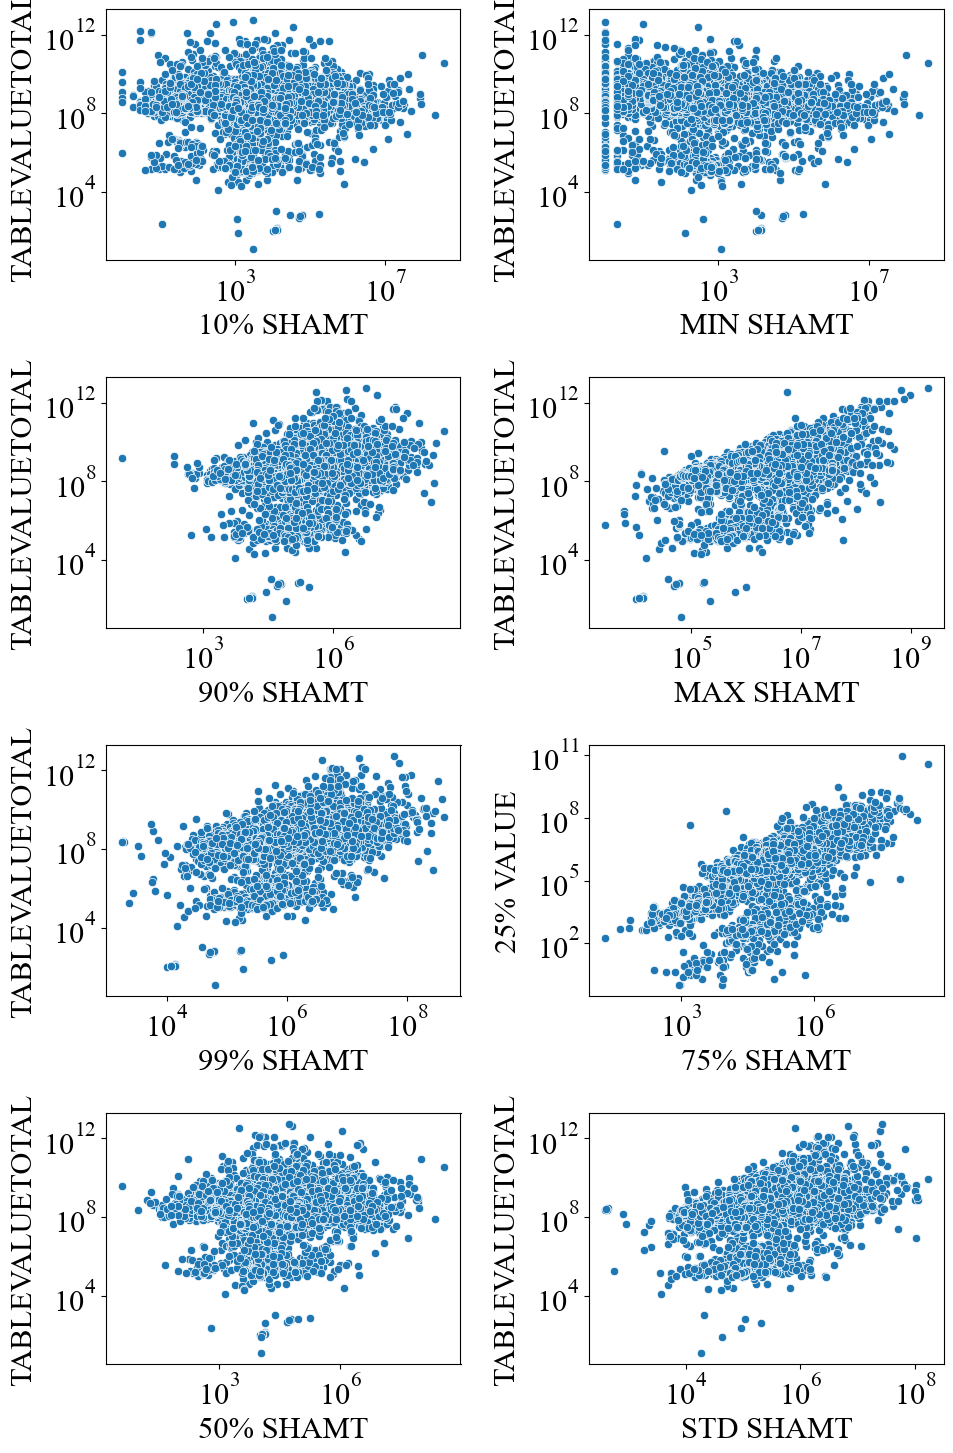

In [55]:
# fig, ax = plt.subplots(1,1,figsize=(6,3))
fig, ax = plt.subplots(4,2,figsize=(10,15))

a2 = ax[0,0]
a3 = ax[1,0]
a4 = ax[2,0]
a5 = ax[3,0]

a6 = ax[0,1]
a7 = ax[1,1]
a8 = ax[2,1]
a9 = ax[3,1]

sns.scatterplot(data = df_star, y = 'TABLEVALUETOTAL', x = '10% SHAMT', ax = a2)
a2.set_xscale("log"), a2.set_yscale("log")

sns.scatterplot(data = df_star, y = 'TABLEVALUETOTAL', x = '90% SHAMT', ax = a3)
a3.set_xscale("log"), a3.set_yscale("log")

sns.scatterplot(data = df_star, y = 'TABLEVALUETOTAL', x = '99% SHAMT', ax = a4)
a4.set_xscale("log"), a4.set_yscale("log")

sns.scatterplot(data = df_star, y = 'TABLEVALUETOTAL', x = '50% SHAMT', ax = a5)
a5.set_xscale("log"), a5.set_yscale("log")

sns.scatterplot(data = df_star, y = 'TABLEVALUETOTAL', x = 'MIN SHAMT', ax = a6)
a6.set_xscale("log"), a6.set_yscale("log")

sns.scatterplot(data = df_star, y = 'TABLEVALUETOTAL', x = 'MAX SHAMT', ax = a7)
a7.set_xscale("log"), a7.set_yscale("log")

sns.scatterplot(data = df_star, y = '25% VALUE', x = '75% SHAMT', ax = a8)
a8.set_xscale("log"), a8.set_yscale("log")

sns.scatterplot(data = df_star, y = 'TABLEVALUETOTAL', x = 'STD SHAMT', ax = a9)
a9.set_xscale("log"), a9.set_yscale("log")

plt.tight_layout()
plt.show()

#### Heatmap of correlations with logathmically transformed features.

In [56]:
df_starlog

,LOG TABLEENTRYTOTAL,LOG TABLEVALUETOTAL,LOG 2024_Q2_Seasonall_Adjusted_MM,LOG 2024_Q2_Percent_Change_From_Preceding_Period,LOG MIN VALUE,LOG MAX VALUE,LOG MEAN VALUE,LOG STD VALUE,LOG 25% VALUE,LOG 50% VALUE,...,LOG MEAN SHAMT,LOG STD SHAMT,LOG 25% SHAMT,LOG 50% SHAMT,LOG 75% SHAMT,LOG 01% SHAMT,LOG 99% SHAMT,LOG 10% SHAMT,LOG 90% SHAMT,OTHERINCLUDEDMANAGERSCOUNT
0,5.087596,19.011690,15.221651,1.686399,10.839757,16.053859,13.924094,14.253237,12.744613,13.169647,...,9.804426,10.327945,8.020024,8.995723,9.920922,6.273198,11.801193,7.185160,10.514785,0
1,5.389072,19.226115,13.735142,1.722767,4.174387,16.373494,13.837044,14.221460,9.730294,13.434983,...,9.702978,10.479292,6.134482,8.209036,9.618901,2.217027,12.163329,3.577948,10.621791,0
2,4.912655,18.789060,15.221651,1.686399,0.000000,17.818521,13.876405,15.440341,9.252178,10.925282,...,8.748064,9.694553,5.020586,6.396930,8.171953,1.740466,11.280599,3.713572,9.662116,0
3,2.639057,19.566200,13.217988,1.757858,14.237669,17.804994,16.927143,16.712882,15.052688,16.988091,...,13.458836,13.943712,12.611538,12.729321,13.122363,10.183011,15.224178,12.095141,13.933294,0
4,4.927254,18.878571,15.221651,1.686399,0.000000,17.867387,13.951317,15.508026,9.231294,10.822963,...,8.931397,10.058834,5.068904,6.332391,8.046309,1.747459,11.608890,3.843744,9.546055,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7046,2.833213,18.802778,13.832620,1.757858,11.128542,17.816835,15.969565,16.626060,13.377663,14.709798,...,13.746338,14.555338,10.149097,11.884758,13.123944,8.875360,15.841736,10.006910,14.636564,0
7047,3.258097,19.310607,13.832620,1.757858,10.270558,18.293014,16.052510,16.842452,13.433819,14.532378,...,13.381527,14.360504,10.309985,11.663606,12.596436,8.802335,15.778571,9.237518,13.982339,0
7048,3.433987,18.995486,13.832620,1.757858,10.203407,17.753321,15.561498,16.279042,13.764446,14.392405,...,13.297660,14.279301,10.414333,11.278418,12.583174,8.790847,15.741675,10.015476,13.880835,0
7049,3.044522,12.073021,13.117614,1.335001,2.890372,10.343290,9.028499,9.190902,4.564348,8.716863,...,12.144435,12.406478,7.047517,11.244091,12.377889,5.139322,13.640419,6.336826,13.033783,0


In [57]:
df_starlog1 = df_starlog[[
    'LOG TABLEVALUETOTAL',
    'LOG MIN SHAMT',
    'LOG MAX SHAMT',
    'LOG MEAN SHAMT',
    'LOG STD SHAMT',
    'LOG 25% SHAMT',
    'LOG 50% SHAMT',
    'LOG 75% SHAMT',
    'LOG 01% SHAMT',
    'LOG 99% SHAMT',
    'LOG 10% SHAMT',
    'LOG 90% SHAMT']]

df_starlog2 = df_starlog[[
    'LOG TABLEVALUETOTAL',
    'LOG MIN VALUE',
    'LOG MAX VALUE',
    'LOG MEAN VALUE',
    'LOG STD VALUE',
    'LOG 25% VALUE',
    'LOG 50% VALUE',
    'LOG 75% VALUE',
    'LOG 01% VALUE',
    'LOG 99% VALUE',
    'LOG 10% VALUE',
    'LOG 90% VALUE',
]]


In [58]:
corr =  df_starlog2.corr()

<Axes: >

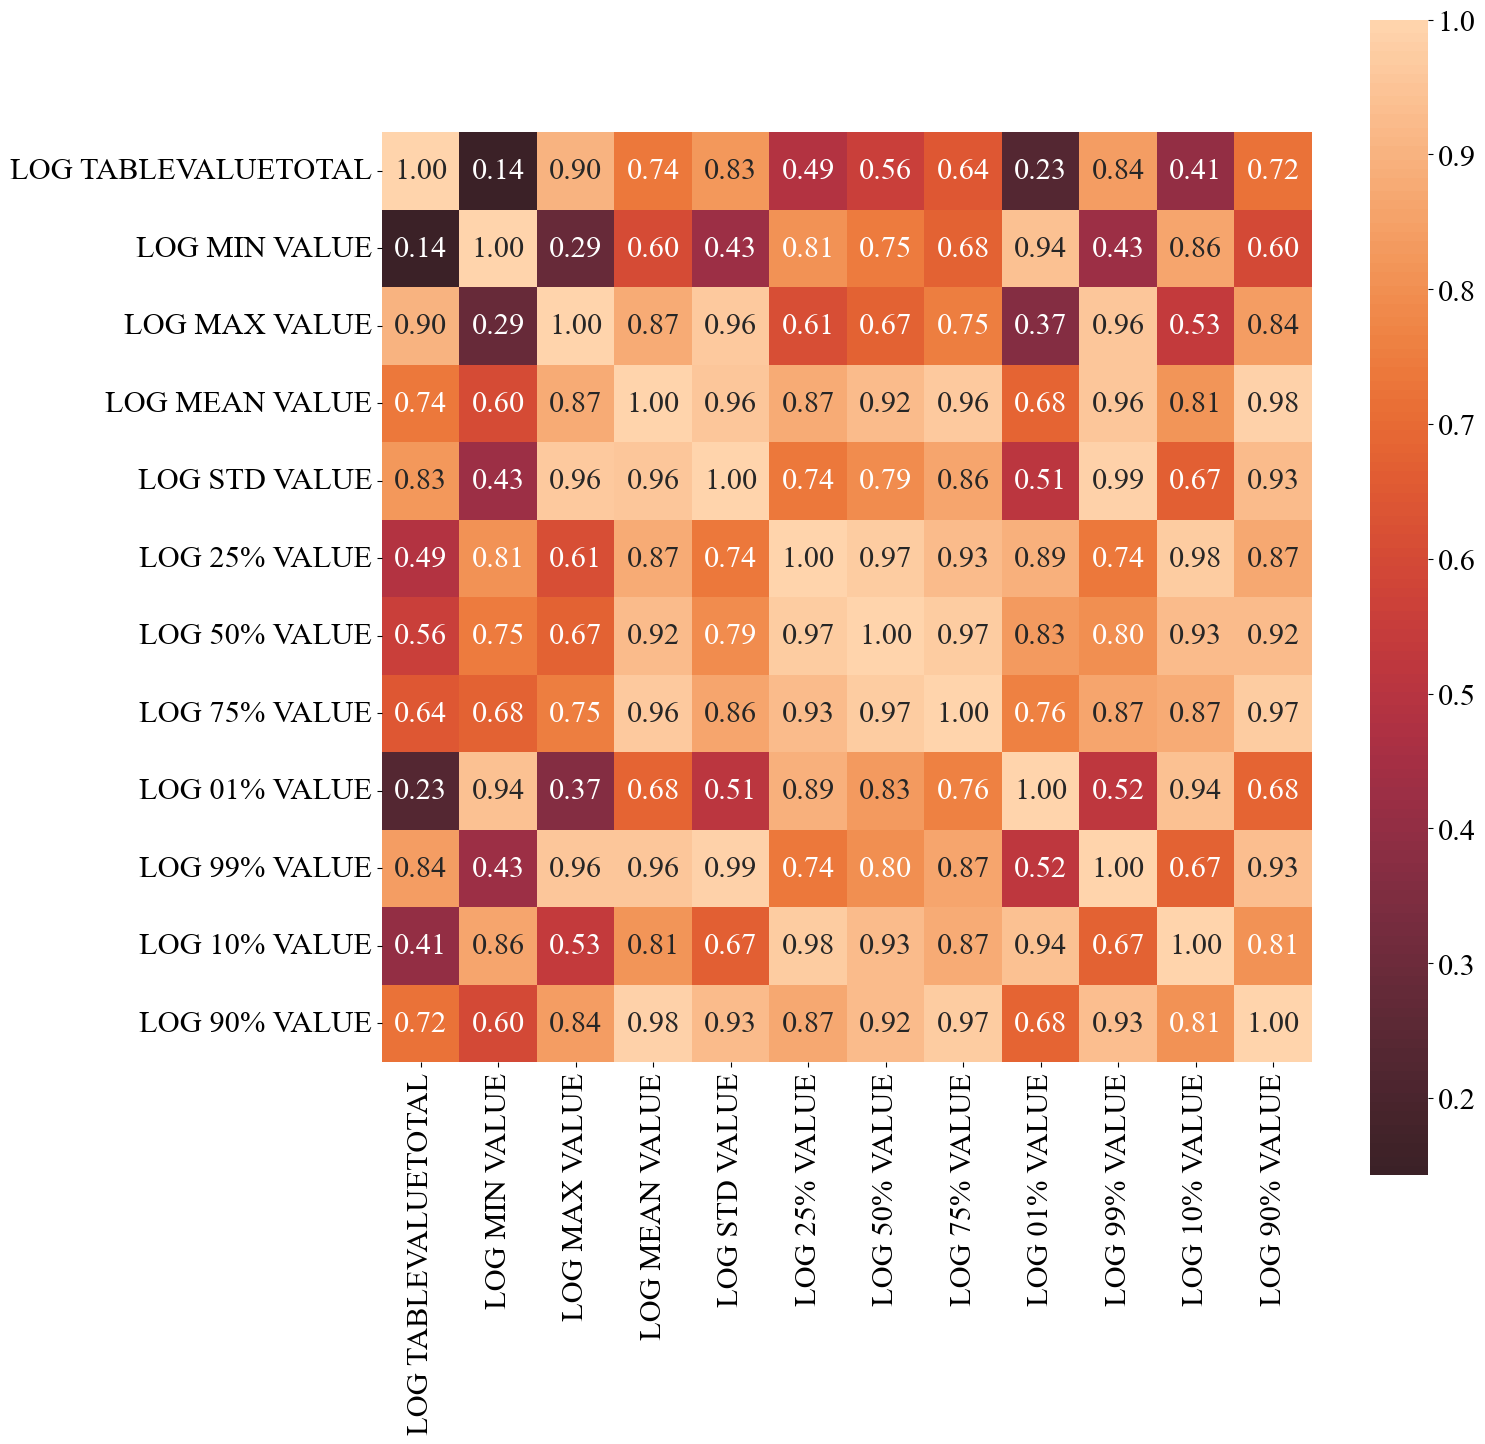

In [59]:

plt.figure(figsize=(15, 15))
sns.heatmap(corr, center=0, annot=True,fmt='.2f', square=True)

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [117]:
df_starlog.replace([np.inf, -np.inf], np.nan, inplace=True)

/var/folders/v2/5xt7prm10w1bkb7j4lrt_42m0000gn/T/ipykernel_15167/3814133624.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_starlog.replace([np.inf, -np.inf], np.nan, inplace=True)


In [118]:
df_starlog.dropna(how="all", inplace=True)

/var/folders/v2/5xt7prm10w1bkb7j4lrt_42m0000gn/T/ipykernel_15167/2644930512.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_starlog.dropna(how="all", inplace=True)


In [198]:
feature_subset = [
    'LOG MAX SHAMT',
    'LOG STD SHAMT',
    'LOG STD VALUE',
    'LOG MEAN VALUE',
    'LOG MAX VALUE',
    'LOG MIN VALUE'
]
X = df_starlog.drop(columns=['LOG TABLEVALUETOTAL'])
y = df_starlog['LOG TABLEVALUETOTAL']

In [199]:
X = X[~y.isna()]  # Keep only rows where y is not NaN
y = y.dropna()    # Drop the rows where y is NaN

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## XGBoost Description

XGBoost stands for Extreme Gradient Boosting which is a scalable, distributed gradient boosting decision tree machine learning method. First, we learned gradient boosting is a boosting method which additvely generates 'weak learners' and utilizes a gradient descent algorithm to create an ensemble, stronger model. Targeted outcomes for each subsequent tree in this method is based on the errors/residuals of the previous model, creating a new model based on the residuals of the previous model.

Now, XGBoost is similar to Gradient Boosting in the sense that it builds an ensemble of weak learners sequentially, where the subsequent models would correct the errors of the previous model by minimizing a loss function using a gradient descent like procedure. XGBoost has several notable improvements and changes compared to this method however:

- Regularization/Shrinkage

XGBoost incorporates both L1 (Lasso) and L2 (Ridge) Regularization terms in the objective/loss function. Similar to other regression techniques such as linear or logistic regression, these regularization parameters help to prevent overfitting by penalizing overly complex models and makes the final ensemble more robust. The L1 regularization can push leaf weights to 0, similar to lasso in linear regression and can remove features from the model entirely which can be seen as feature selection. In our case, the loss function is the mean squared error.

\begin{align*}
L = \sum_{i=1}^N L(y_i, \hat{y_i}) + \lambda \sum_{t=1}^T w_t^2 + \alpha \sum_{t=1}^T |w_T|
\end{align*}

Where $\lambda$ is the L2 regularization parameter and $\alpha$ is the L1 regularization parameter. The first Loss is summed over all training examples, the MSE. The second and third sum represent the regularization term applied to the weights of the leaves in the decision trees, summing over all the T trees in the ensemble.

- Parallelization

XGBoost can parallelize the tree building process, but this doesn't mean training multiple trees in parallel but rather finding the optimal splits within each tree. It parallelizes the computation of splits for each node in the tree, when we find the best possible split at each node we have to evaluate every feature at different feature thresholds to find which to split on. Instead of checking ont at a time, XGBoost performs this in parallel, meaning it evaluates multiple splits at the same time which speeds up the process of finding the best split.

- Tree Pruning

XGBoost uses depth-first growth rather than the traditional level order we discussed in class regarding single decision trees. The tree is growth depth-first, it makes all of the splits along one path for a branch first before moving to the next branch. This helps to improve the computation performance of the algorithm.

- Feature Importance

We can easily extract the feature importance from XGBoost models, in contrast to Gradient Boosting models which require external steps.



Some resources:

https://www.analyticsvidhya.com/blog/2018/09/an-end-to-end-guide-to-understand-the-math-behind-xgboost/

https://medium.com/@dakshrathi/regularization-in-xgboost-with-9-hyperparameters-ce521784dca7#:~:text=Regularization%20in%20XGBoost%20helps%20mitigate,tailored%20to%20the%20training%20data.

https://gabrieltseng.github.io/posts/2018-02-25-XGB/

## The Algorithm:

XGBoost starts with a simple model, such as a stump or depth 2 decision tree. It adds decision trees sequentially in the same manner as Gradient Boosting, where the second tree will try to correct the mistakes from the initial model's residuals. Trees are added sequentially to the model, every tree trying to correct the residuals of the previous model. As stated previously, XGBoost uses a depth-first tree growth growing one branch at a time before the next node, but if the trees are stumps it is essentially the same as level-order growth.

The objective function in XGBoost is made up of 2 parts, a loss function to measure how far off the model's predictions are from the true values, and the regularizaiton term to prevent the model from overfitting by penalizing overly complex trees. The XGBoost algorithm wants to minimize this objective function in training the model, it attempts to both reduce the loss in the current tree by improving predictions on the training data and keep model complexity low. At each split, the algorithm will look for the best feature to split and minimize the objective function, considering both reduction in the loss function and complexity penalty.

The XGBoost algorithm uses a depth-first tree growth, exploring one branch fully before moving to the next. The algorithm stops once some maximum number of estimators/trees is reached, in which case the final model is created based on the combination of all previous models.

In [ ]:
pip install xgboost


In [122]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Create the XGBoost regressor model
model = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse')


For the XGBoost model we experiment with several different features to use in the GridSearch. First, we set the n_estimators argument and give it 5 possible values, 100, 200, 300, 500, and 700. This parameter will control the number of trees, in our case stumps, produced in the model. More trees could cause overfitting and allow the model to learn more complex patterns in the data, so we limited the number of trees instead of using too many. However, one could consider values such as 500 or 700 a lot, but with lower learning rates a greater number of trees would be necessary.

The learning rate parameter we chose to be a set value rather than adaptive, but we select the learning rate based on cross validation. We understand that a lower learning rate makes it so that the model requires more trees to fully converge, but could be more precise and prevent overfitting. We didn't choose an extremely high learning rate since as we saw in class for other algorithms such as Gradient Boosting a higher learning rate could cause the algorithm to diverge which we would like to avoid.

As for max depth we decided to experiment with 2 values, 1 and 2. A max depth of 1 would essentially be training over stumps with 1 depth, similar to what we did in class. On the other hand, a max depth of 2 adds one more layer to this tree. We decided to use these 2 values and not go any higher since these Boosting algorithms work well with "weak-learners" meaning in our case trees of lower depths rather than overly large trees, since the smaller trees have lower bias and improve its accuracy overtime as more trees are added to the model.

We decided to use the same 4 parameters for both alpha and lambda, the regularization parameters. This is a key difference compared to other Boosting algorithms, such as Gradient Boosting which doesn't use regularization. The alpha represents the L1 regularization term for Lasso, adding a penalty based on the absolute value of leaf weights, while the lambda is the L2 regularization term for Ridge, which adds a penalty based on the squared values of leaf weights.

In [327]:
param_grid = {
    'n_estimators': [100, 200, 300, 500, 700],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [1, 2], 
    'alpha': [0, 0.001, 0.01, 0.1], 
    'lambda': [0, 0.001, 0.01, 0.1]     
}


In [328]:
# Define cross-validation strategy
from sklearn.model_selection import KFold

cv = KFold(n_splits=5, shuffle=True, random_state=42)


In [117]:
grid_search = GridSearchCV(estimator=model, 
                           param_grid=param_grid, 
                           scoring='neg_mean_squared_error', 
                           cv=cv, 
                           verbose=0, 
                           n_jobs=-1, 
                           return_train_score=True)

grid_search.fit(X_train, y_train)

grid_search.best_params_

{'alpha': 0.1,
 'lambda': 0.01,
 'learning_rate': 0.1,
 'max_depth': 2,
 'n_estimators': 300}

From here we can observe the best parameters the XGBoost model chose based on our parameter grid:

In [332]:
grid_search.best_params_

{'alpha': 0.1,
 'lambda': 0.01,
 'learning_rate': 0.1,
 'max_depth': 2,
 'n_estimators': 300}

We now look at a feature importance plot to observe the most important features based on this XGBoost model.

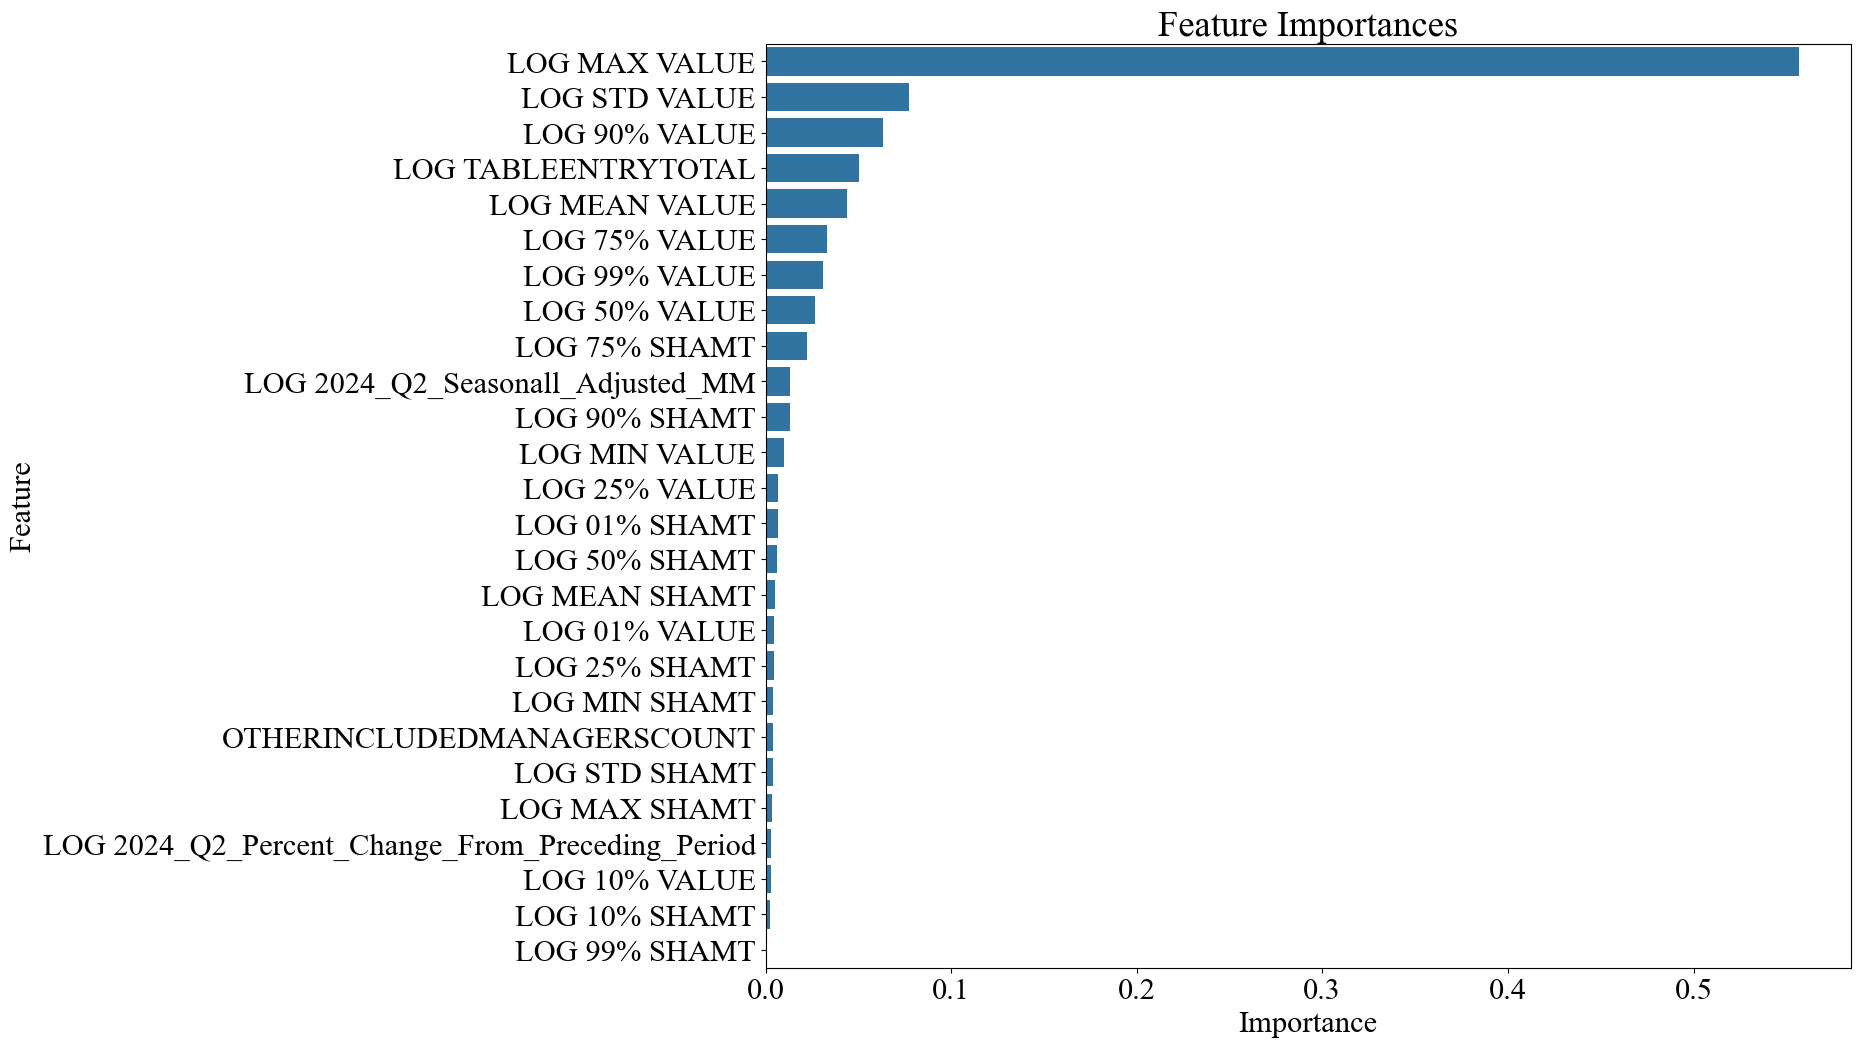

In [333]:
importances = grid_search.best_estimator_.feature_importances_

feature_names = X_train.columns

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(14, 12))

sns.barplot(x=importances[indices], y=feature_names[indices])
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

As seen in the feature importance plot, one obvious feature stands out. It seems as if LOG MAX VALUE is by far the most important predictor found through the XGBoost model. This does make sense, as a large max asset value would correspond with a large total value. Some features which were deemed unimportant were Log 99% SHAMT and Log 10% SHAMT, which represent percentiles of sam transations. This is usually a more rare activity and would have little predictive power in our model, so it makes sense that it doesn't strongly influence the target variable.

Next, we can split the training data into a train and validation set. We saw earlier the optimal number of estimators found was 300, but potentially the actual validation MSE is found at a smaller number of estimators. To investigate this, we split the train data into this train/validation split (80% train) and use an evaluation set which is similar to the "staged_score" in AdaBoosting to calculate the train/val RMSE at each estimator/tree.

In [334]:
X_train80, X_val, y_train80, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [118]:
eval_set = [(X_train80, y_train80), (X_val, y_val)]

eval_results = grid_search.best_estimator_.fit(X_train80, y_train80, eval_set = eval_set, verbose=False)

Make the plot:

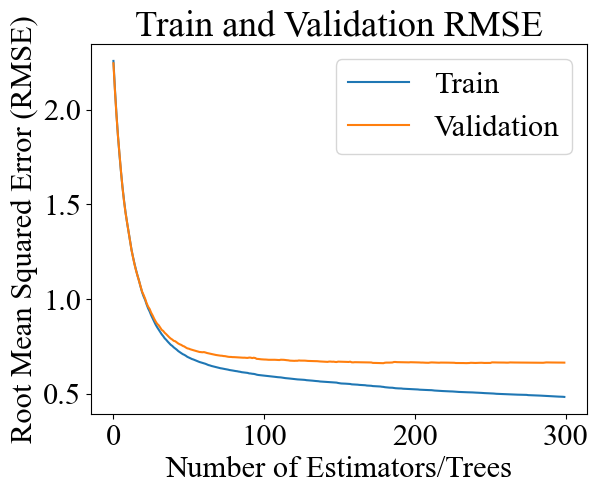

In [119]:
eval_results = grid_search.best_estimator_.evals_result()

train_rmse = eval_results['validation_0']['rmse']
val_rmse = eval_results['validation_1']['rmse']

plt.plot(train_rmse, label='Train')
plt.plot(val_rmse, label='Validation')

plt.title('Train and Validation RMSE')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.xlabel('Number of Estimators/Trees')
plt.legend()
plt.show()

The lowest validation RMSE:

In [337]:
np.argmin(val_rmse)

178

We see the lowest validation RMSE was actually at 178 estimators, so we can set this to be the new number of estimators alongside the other best parameters we found in grid search from earlier.

In [338]:
best_params = grid_search.best_params_
del best_params['n_estimators']

In [339]:
final_model = xgb.XGBRegressor(**best_params, n_estimators = np.argmin(val_rmse))

final_model.fit(X_train, y_train)

XGBRegressor(alpha=0.1, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, lambda=0.01, learning_rate=0.1,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=178, n_jobs=None, ...)

In [344]:
best_model = grid_search.best_estimator_

y_pred = final_model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)  
print(f"Mean Squared Error (MSE) on Test Data: {mse}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²) on Test Data: {r2}")

Mean Squared Error (MSE) on Test Data: 0.6614980305304603
R-squared (R²) on Test Data: 0.8897129938657051
